# Problem Statement: - 
A Mobile Phone manufacturing company wants to launch its three brand new phone into the market, but before going with its traditional marketing approach this time it want to analyze the data of its previous model sales in different regions and you have been hired as an Data Scientist to help them out, use the Association rules concept and provide your insights to the company’s marketing team to improve its sales.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ali umar hasan\Desktop\data science\Association rules\myphonedata.csv")

In [3]:
df.head()

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1


In [5]:
df.drop(["V3","V2","V1"], axis = 1 , inplace = True)

In [6]:
df.head()

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1


In [7]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Apriori algorithm 


In [9]:
# with 10% support
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.181818,(orange)
4,0.545455,(blue)
5,0.363636,"(red, white)"
6,0.363636,"(red, blue)"
7,0.181818,"(white, orange)"
8,0.363636,"(white, blue)"
9,0.181818,"(red, white, blue)"


In [10]:
# 70% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
5,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
6,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
7,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
8,"(red, white)",(blue),0.363636,0.545455,0.181818,0.500000,0.916667,-0.016529,0.909091
9,"(red, blue)",(white),0.363636,0.636364,0.181818,0.500000,0.785714,-0.049587,0.727273


In [11]:
# Lift Ratio > 1 ......is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
5,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
6,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
7,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


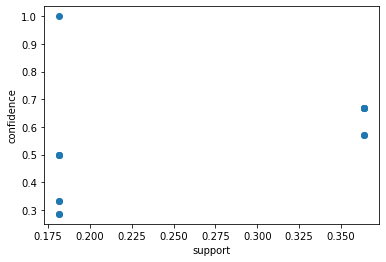

In [12]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

# Association Rules

In [14]:
# with 5% support
frequent_itemsets2=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.181818,(green)
3,0.090909,(yellow)
4,0.181818,(orange)
5,0.545455,(blue)
6,0.363636,"(red, white)"
7,0.090909,"(green, red)"
8,0.090909,"(red, orange)"
9,0.363636,"(red, blue)"


In [15]:
# 90% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,(green),(red),0.181818,0.545455,0.090909,0.500000,0.916667,-0.008264,0.909091
3,(red),(green),0.545455,0.181818,0.090909,0.166667,0.916667,-0.008264,0.981818
4,(red),(orange),0.545455,0.181818,0.090909,0.166667,0.916667,-0.008264,0.981818
5,(orange),(red),0.181818,0.545455,0.090909,0.500000,0.916667,-0.008264,0.909091
6,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
7,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
8,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
9,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf


In [16]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
5,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
6,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
7,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


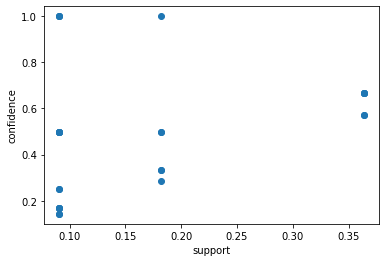

In [17]:
# visualization of obtained rule
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()